<p style="font-family: Arial; font-size:3.5em;color:purple; font-style:bold"><br>
Análise de dados sobre focos de incêndio<br><br><br>no Pantanal utilizando Python</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Fonte dos dados: NASA MODIS/Aqua+Terra Thermal Anomalies/Fire locations 1km V006 NRT (Vector data) distributed by LANCE FIRMS</p>
<p><br>Link para o disclaimer da empresa: https://earthdata.nasa.gov/earth-observation-data/near-real-time/citation</p>


Nesse projeto iremos utilizar a base de dados citada para tentar entender se realmente há um aumento da quantidade de focos de incêndio na região do Pantanal brasileiro

Por não achar uma definição exata para os limites da região do Pantanal, fiz uma aproximação com um quadilátero numa área definida por diferentes textos e fotos (que aproxima a região verdadeira). Delimitei a área pela mesma fonte de dados (FIRMS) e as coordenadas do polígino utilizado são:  POLYGON((-58.97324 -14.87,-54.44687 -14.7821,-54.40292 -20.45105,-58.27011 -20.75867,-58.97324 -14.87))

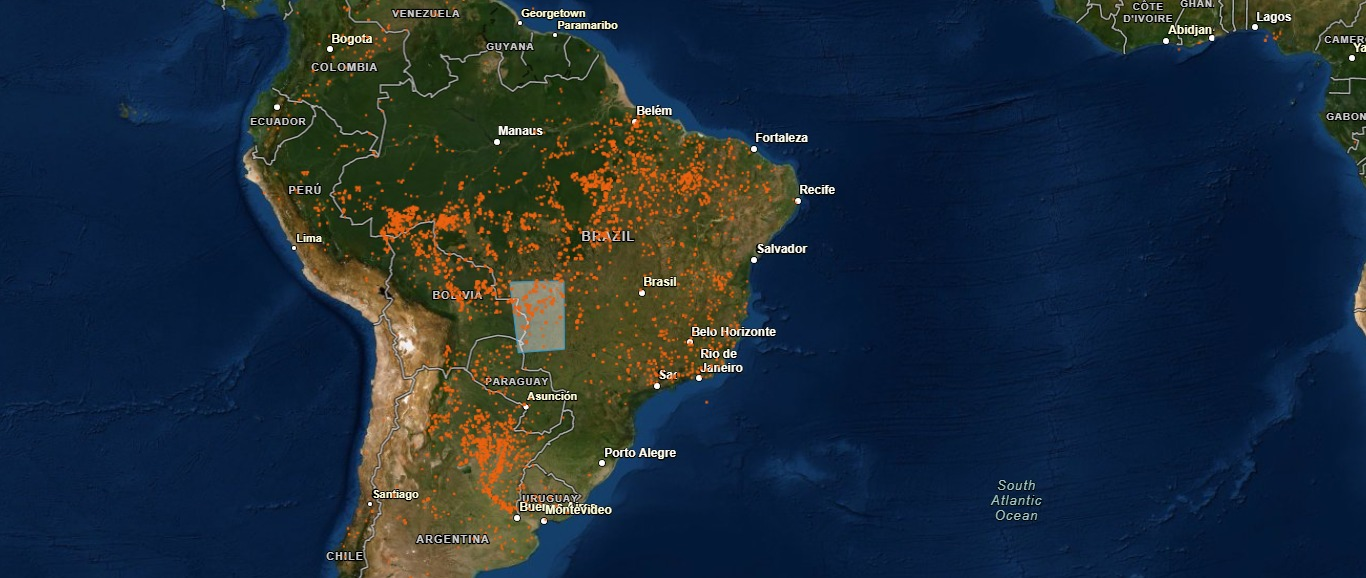

In [6]:
from IPython.display import Image
Image('./regiao.png')

Para quem busca entender melhor a natureza dos dados: https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl#ed-firms-attributes

Abaixo podemos ver todos os dados da nossa base plotados de uma só vez, reforçando a demonstração da área delimitada bem como a densidade da base de dados

Nossa base dados possui 96050 linhas e 16 colunas


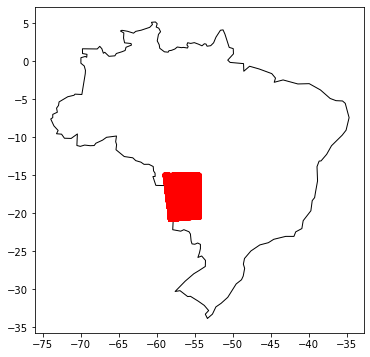

In [143]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from geopandas import GeoDataFrame

print(f'Nossa base dados possui {df.shape[0]} linhas e {df.shape[1]} colunas')
df = pd.read_csv('./CSV/fire_archive_M6_154031.csv', delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(10,6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.show()

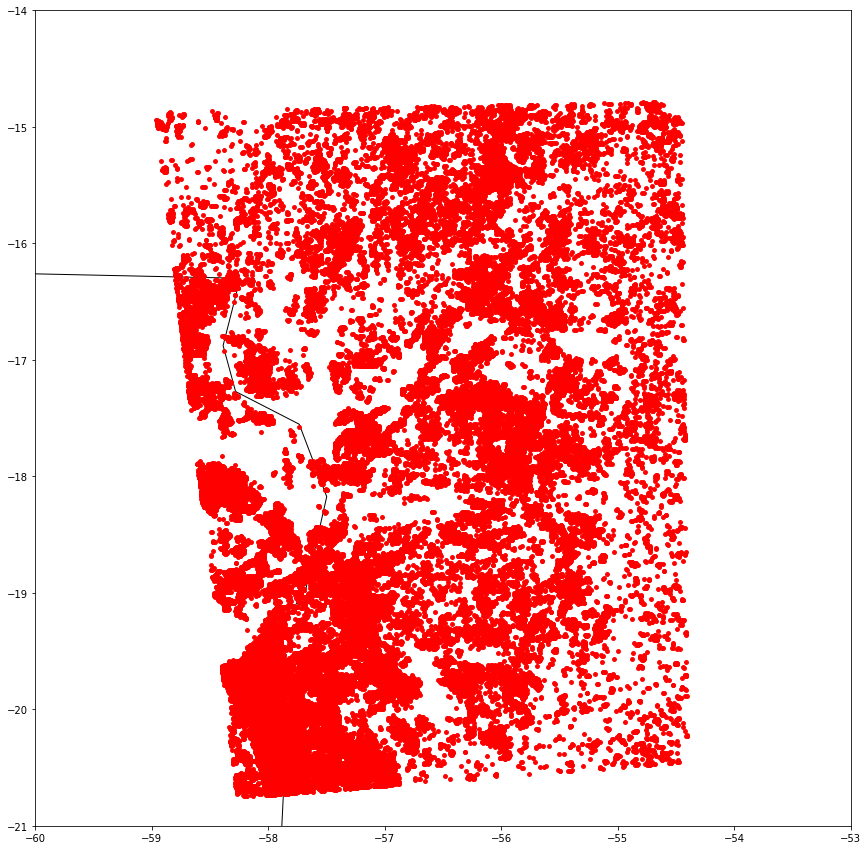

In [3]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.show()

Acima temos os focos de todos os anos plotados novamente, mas com um zoom na região de interesse 

Vamos então criar um dataframe diferente para cada ano, colocando em cada um deles toda a informação referente ao mesmo.

In [2]:
cols = ['latitude','longitude','brightness','scan','track','acq_date','acq_time','satellite','instrument','confidence','version','bright_t31','frp,daynight','type']

df15 = pd.DataFrame(columns = cols)
for i in range(0, df.shape[0]):
    if ((df['acq_date'][i])[0:4] == '2015'):
        df15.loc[i, :] = df.loc[i,:]
print('Deu certo!')

Deu certo!


In [3]:
df16 = pd.DataFrame(columns = cols)
for i in range(0, df.shape[0]):
    if ((df['acq_date'][i])[0:4] == '2016'):
        df16.loc[i, :] = df.loc[i,:]
print('Deu certo!')

Deu certo!


In [4]:
df17 = pd.DataFrame(columns = cols)
for i in range(0, df.shape[0]):
    if ((df['acq_date'][i])[0:4] == '2017'):
        df17.loc[i, :] = df.loc[i,:]
print('Deu certo!')

Deu certo!


In [5]:
df18 = pd.DataFrame(columns = cols)
for i in range(0, df.shape[0]):
    if ((df['acq_date'][i])[0:4] == '2018'):
        df18.loc[i, :] = df.loc[i,:]
print('Deu certo!')

Deu certo!


In [6]:
df19 = pd.DataFrame(columns = cols)
for i in range(0, df.shape[0]):
    if ((df['acq_date'][i])[0:4] == '2019'):
        df19.loc[i, :] = df.loc[i,:]
print('Deu certo!')

Deu certo!


In [7]:
df20 = pd.DataFrame(columns = cols)
for i in range(0, df.shape[0]):
    if ((df['acq_date'][i])[0:4] == '2020'):
        df20.loc[i, :] = df.loc[i,:]
print('Deu certo!')

Deu certo!


Agora vamos começar a plotar os mapas. Inicialmente, plotaremos todos os focos de cada ano.

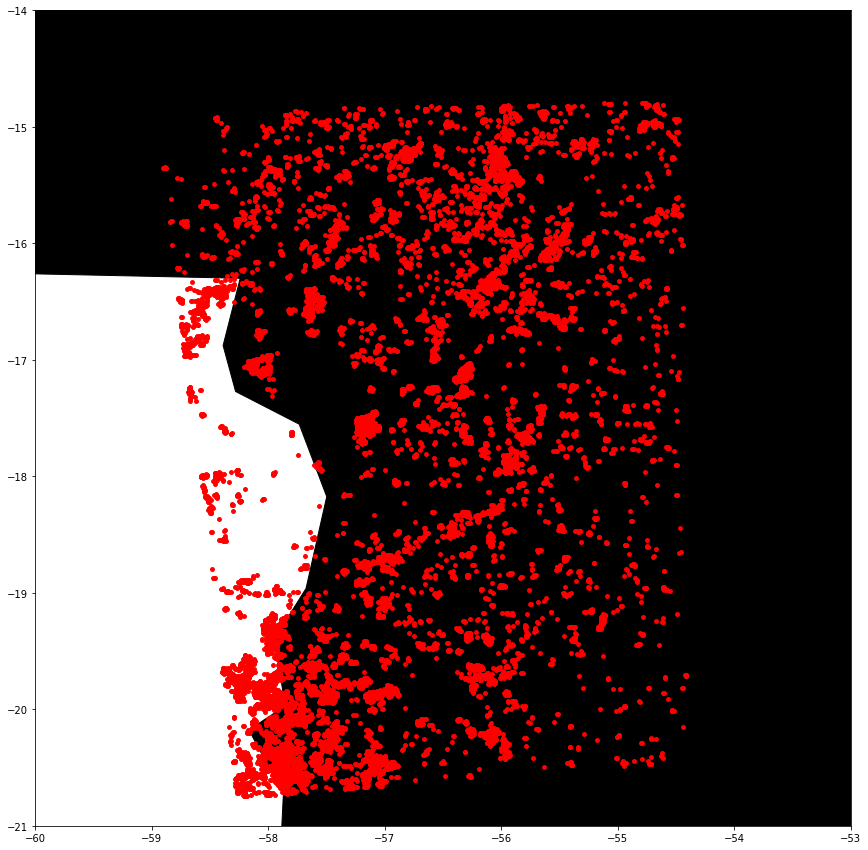

In [17]:
geometry= [Point(xy) for xy in zip(df15['longitude'], df15['latitude'])]
gdf = GeoDataFrame(df15, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.savefig('2015.png', format='png')
plt.show()


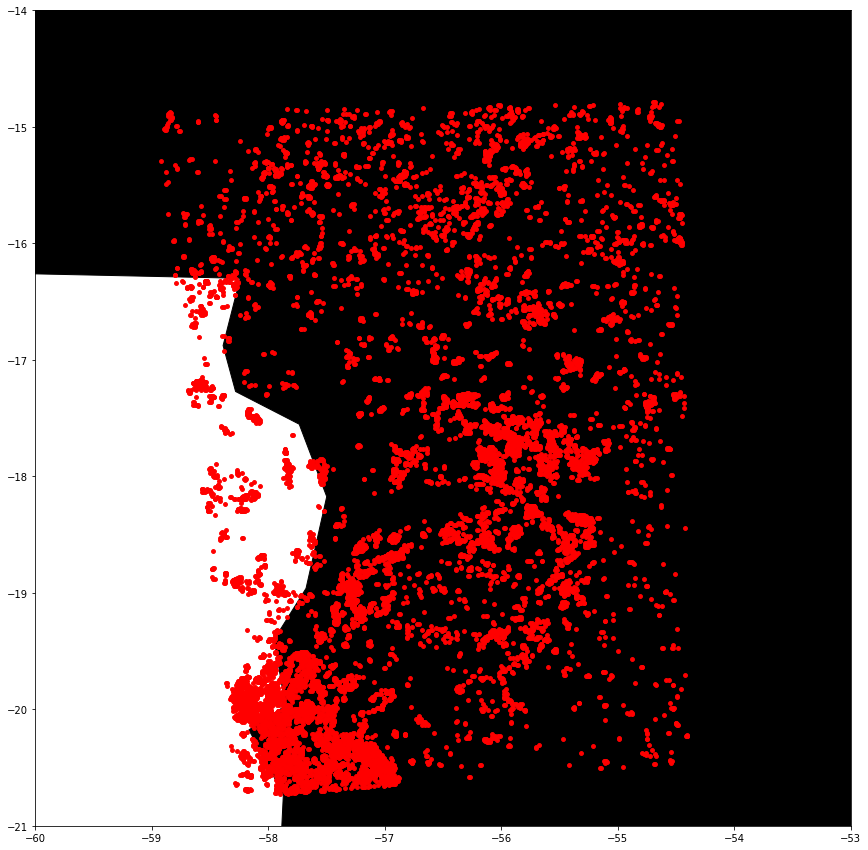

In [43]:
geometry= [Point(xy) for xy in zip(df16['longitude'], df16['latitude'])]
gdf = GeoDataFrame(df16, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.savefig('2016.png', format='png')
plt.show()

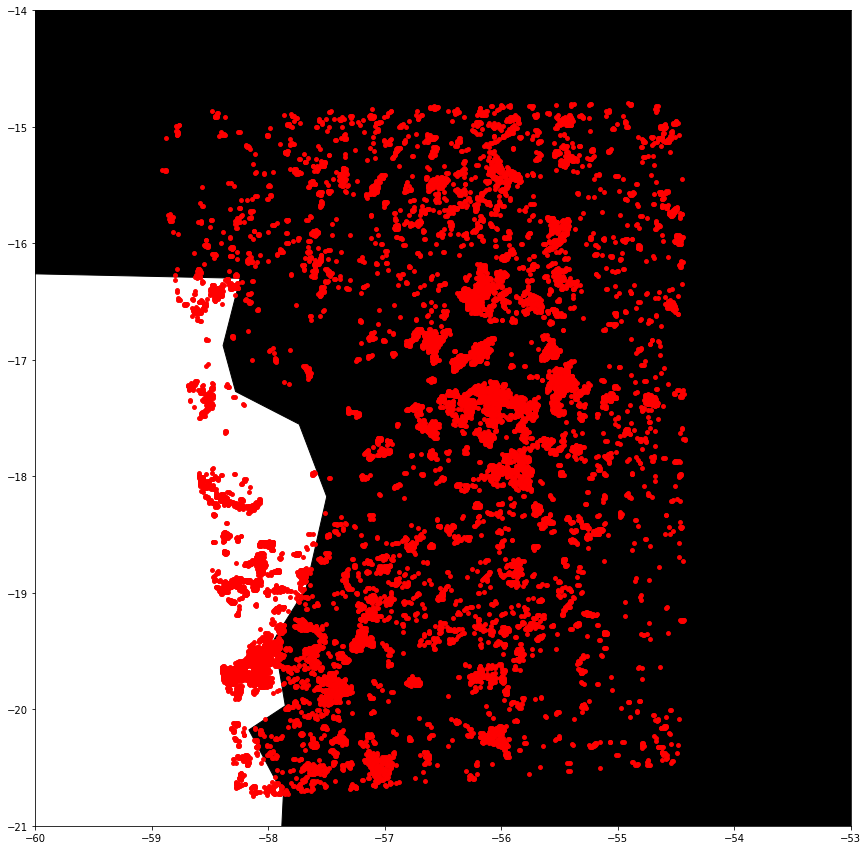

In [15]:
geometry= [Point(xy) for xy in zip(df17['longitude'], df17['latitude'])]
gdf = GeoDataFrame(df17, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.savefig('2017.png', format='png')
plt.show()

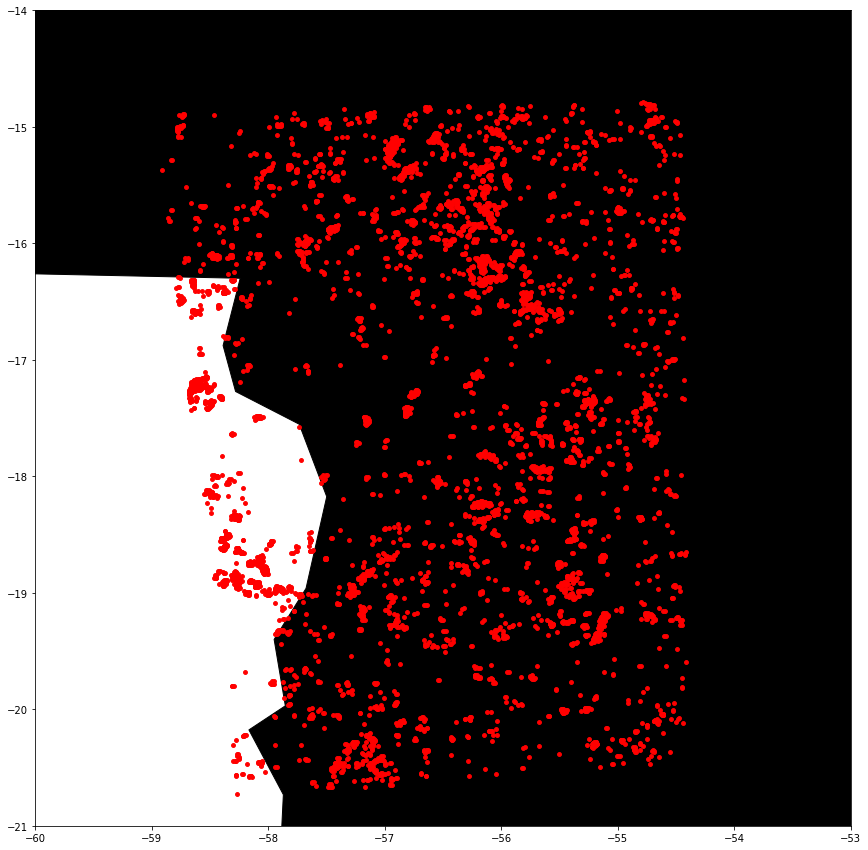

In [14]:
geometry= [Point(xy) for xy in zip(df18['longitude'], df18['latitude'])]
gdf = GeoDataFrame(df18, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.savefig('2018.png', format='png')
plt.show()

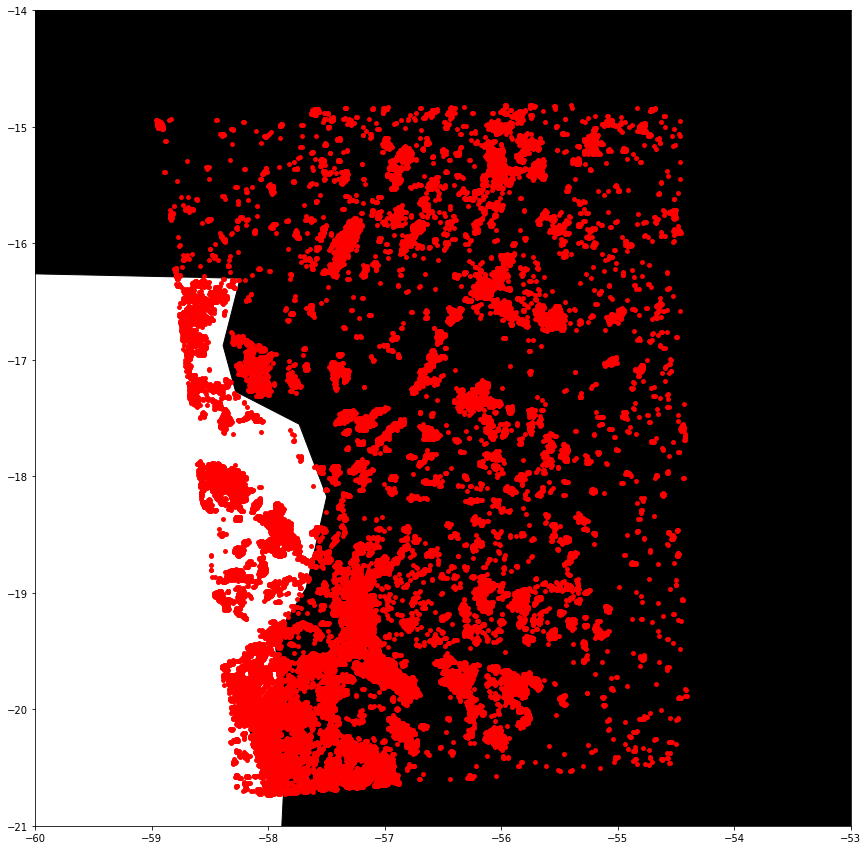

In [18]:
geometry= [Point(xy) for xy in zip(df19['longitude'], df19['latitude'])]
gdf = GeoDataFrame(df19, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.savefig('2019.png', format='png')
plt.show()

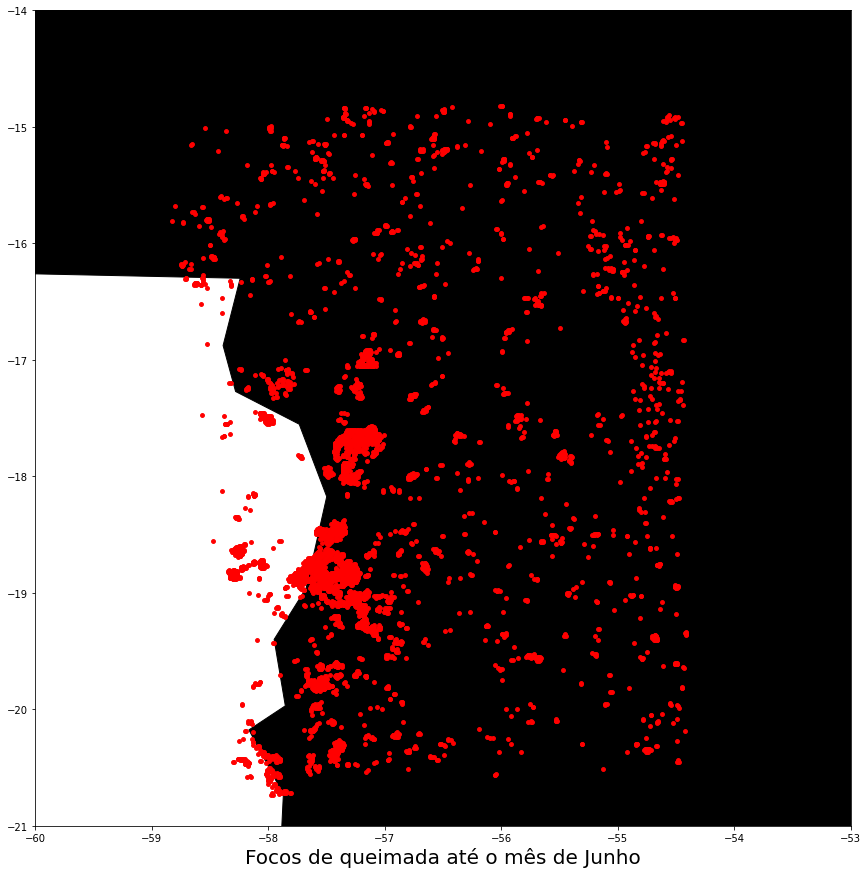

In [142]:
geometry= [Point(xy) for xy in zip(df20['longitude'], df20['latitude'])]
gdf = GeoDataFrame(df20, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.xlabel("Focos de queimada até o mês de Junho", fontsize=20)
plt.savefig('2020.png', format='png')
plt.show()

Podemos perceber que 2020 parace melhor, mas isso ocorreu pois os dados desse ano só vão até o mês de junho. Para resolver isso, devemo comparar cada ano de Janeiro até o mês de Junho. Antes disso, um gráfico sumarizando a quantidade de focos por ano (de Janeiro a Dezembro) até o ano de 2019

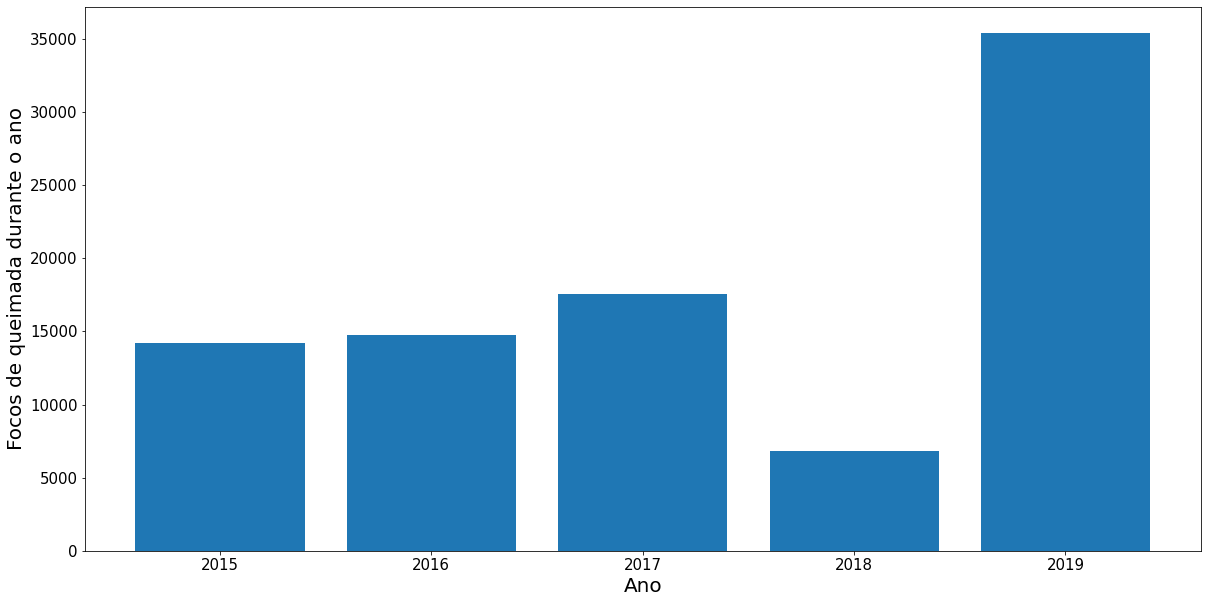

In [118]:
x = [df15.shape[0], df16.shape[0], df17.shape[0], df18.shape[0], df19.shape[0]]
y = ['2015', '2016', '2017', '2018', '2019']
f, ax = plt.subplots(figsize=(20,10))
plt.bar(y, x)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel("Ano", fontsize = 20)
plt.ylabel("Focos de queimada durante o ano", fontsize=20)
plt.savefig('FocosAte2019.png', format='png')

In [ ]:
x = [df15.shape[0], df16.shape[0], df17.shape[0], df18.shape[0], df19.shape[0]]
y = ['2015', '2016', '2017', '2018', '2019']
f, ax = plt.subplots(figsize=(20,10))
plt.bar(y, x)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

Feito isso, primeiro vamos comparar os focos até o mês de Junho com um gráfico de barras (agora percebemos que 2020 possui quase 2x mais focos que 2019 e mais que 3x do que qualquer um dos outros anos)

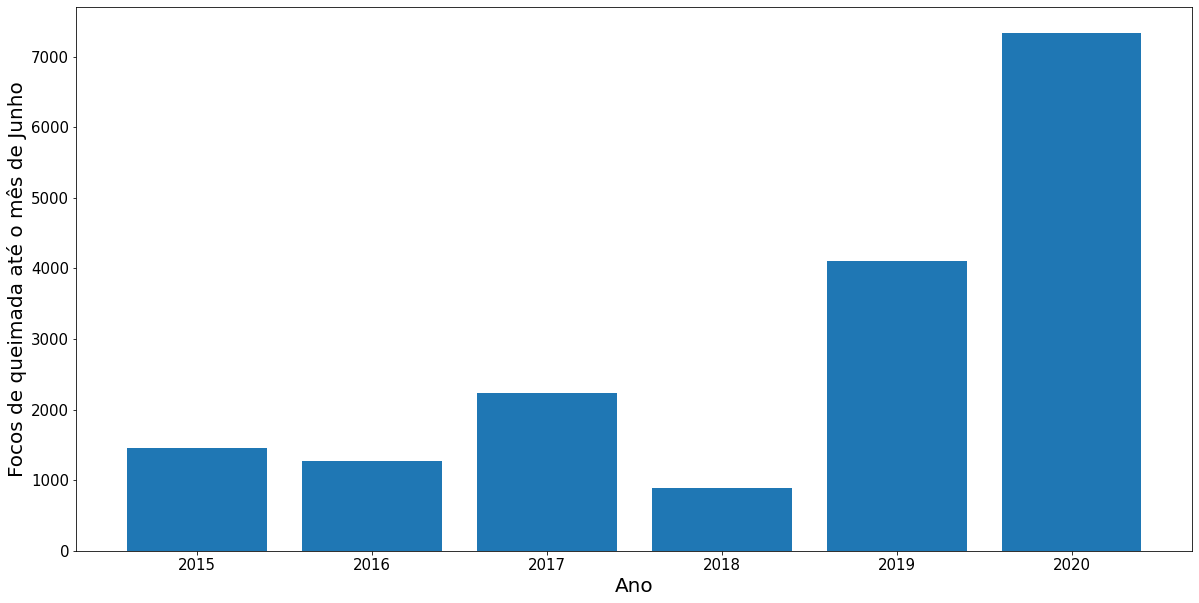

In [116]:
QtdAteJunho = {'2015': 0, '2016':0, '2017':0, '2018':0, '2019':0, '2020':0} 
def cont(DF, ANO):
    for i in range(DF.index[0], DF.index[DF.shape[0]-1]):
        if((DF['acq_date'][i])[5:7] != '07'):
            QtdAteJunho[ANO] += 1
        else:
            break 
cont(df15, '2015')
cont(df16, '2016')
cont(df17, '2017')       
cont(df18, '2018')       
cont(df19, '2019')       
cont(df20, '2020')    

f, ax = plt.subplots(figsize=(20,10))
plt.bar(QtdAteJunho.keys(), QtdAteJunho.values())
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel("Ano", fontsize = 20)
plt.ylabel("Focos de queimada até o mês de Junho", fontsize=20)
plt.savefig('FocosAteJunho.png', format='png')


Por fim, uma vizualização dos focos até Junho de cada ano (esse mapa é mais justo de ser comparado ao de 2020 visto no começo).

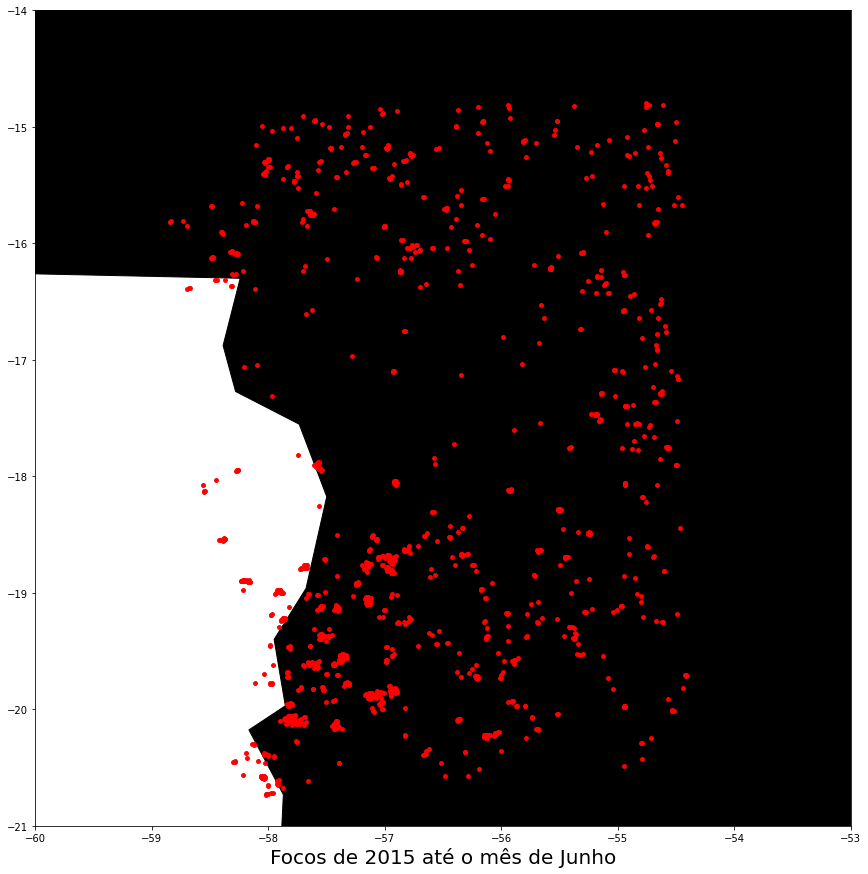

In [136]:
d15 = df15[:][0:1458]
geometry= [Point(xy) for xy in zip(d15['longitude'], d15['latitude'])]
gdf = GeoDataFrame(d15, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.xlabel("Focos de 2015 até o mês de Junho", fontsize = 20)
plt.savefig('2015_ate_junho.png', format='png')
plt.show()

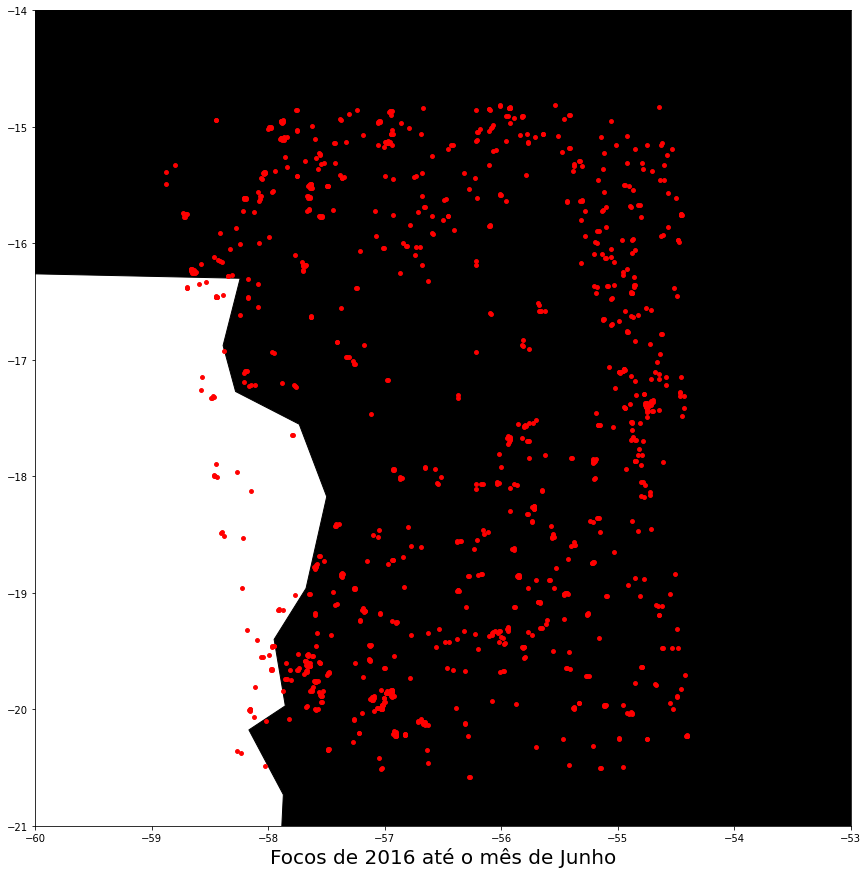

In [137]:
d16 = df16[:][0:1267]
geometry= [Point(xy) for xy in zip(d16['longitude'], d16['latitude'])]
gdf = GeoDataFrame(d16, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.xlabel("Focos de 2016 até o mês de Junho", fontsize = 20)
plt.savefig('2016_ate_junho.png', format='png')
plt.show()

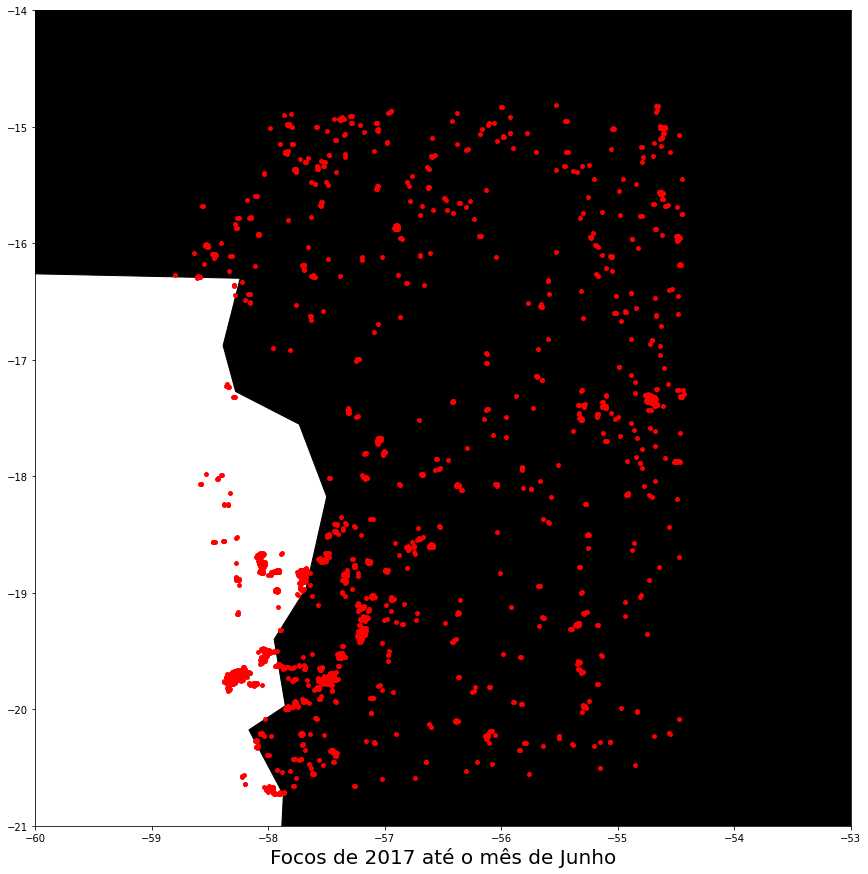

In [138]:
d17 = df17[:][0:2239]
geometry= [Point(xy) for xy in zip(d17['longitude'], d17['latitude'])]
gdf = GeoDataFrame(d17, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.xlabel("Focos de 2017 até o mês de Junho", fontsize = 20)
plt.savefig('2017_ate_junho.png', format='png')
plt.show()


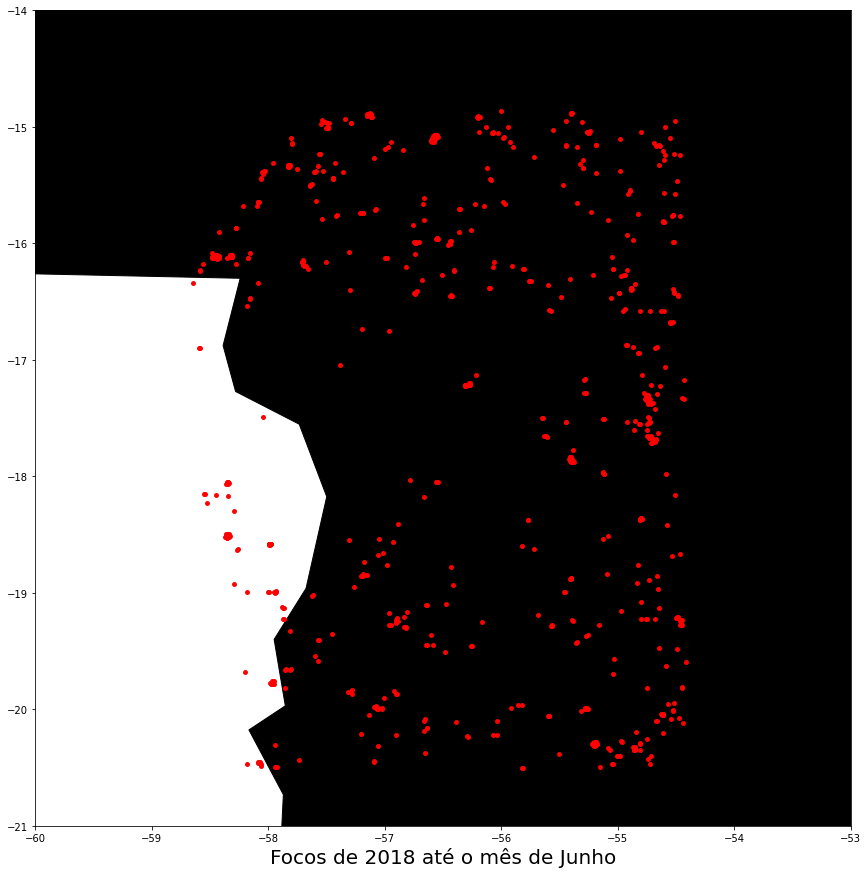

In [139]:
d18 = df18[:][0:896]
geometry= [Point(xy) for xy in zip(d18['longitude'], d18['latitude'])]
gdf = GeoDataFrame(d18, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.xlabel("Focos de 2018 até o mês de Junho", fontsize = 20)
plt.savefig('2018_ate_junho.png', format='png')
plt.show()


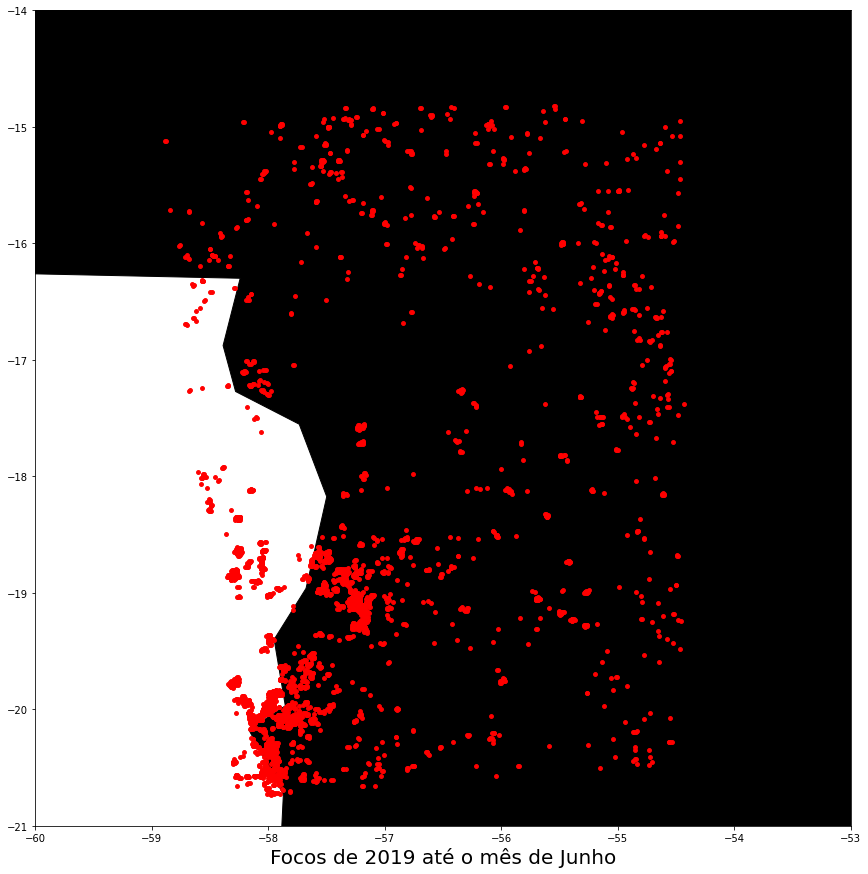

In [140]:
d19 = df19[:][0:4098]
geometry= [Point(xy) for xy in zip(d19['longitude'], d19['latitude'])]
gdf = GeoDataFrame(d19, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Brazil'].plot(
    color='black', edgecolor='black', figsize=(25,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
plt.xlim(-60, -53)
plt.ylim(-21, -14)
plt.xlabel("Focos de 2019 até o mês de Junho", fontsize = 20)
plt.savefig('2019_ate_junho.png', format='png')
plt.show()
